# Peaking test
This notebook uses the `EmissionsPeakTest` class, defined in the scripts section, to explore what level of reduction in Global Fossil CO2 emissions would be necessary to declare a peak with confidence.

Key steps are
- Load data into the EmissionsPeakTest class
- Characterise the noise (key choices here about whether to do the noise around a single trendline, or break the timeseries into a series of segments for analysis)
- Load test data for the future, and calculate the trendline for this data
- Do a bootstrap test to see how likely it is that outturn data with this trendline could actually be produced by a flat trend (H0 is that the trend=0), with just the noise contributing this variation


TODOs:
- Think about noise characterisation further: How best to characterise noise? Should we be breaking the timeseries into different sections? If so, how to endogenously determine this from the analysis?
- Find what level of reductions would be necessary to give a 66% and 90% likelihood of peaking

## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../scripts')

from peak_tester import EmissionsPeakTest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# sns.set_palette('colorblind')

# # Enable grid and update its appearance
# plt.rcParams.update({'axes.grid': True})
# plt.rcParams.update({'grid.color': 'silver'})
# plt.rcParams.update({'grid.linestyle': '--'})

# # Set figure resolution
# plt.rcParams.update({'figure.dpi': 150})

# # Hide the top and right spines
# plt.rcParams.update({'axes.spines.top': False})
# plt.rcParams.update({'axes.spines.right': False})

# # Increase font sizes
# plt.rcParams.update({'font.size': 12})  # General font size
# plt.rcParams.update({'axes.titlesize': 14})  # Title font size
# plt.rcParams.update({'axes.labelsize': 12})  # Axis label font size

## Initialise peaker and characterise noise

In [4]:
peak_tester = EmissionsPeakTest()
peak_tester.load_historical_data(
    'gcb_hist_co2.csv', emissions_col = 'fossil_co2_emissions', year_range = range(1970,2024))

Loaded historical data: 1970-2023
Data points: 54


In [5]:
peak_tester.characterize_noise(method='segments',segment_length=10,distribution='auto',clip_distribution=(0.05,0.95))

Auto-selected normal distribution (AIC: 767.9 vs 769.9)
Fitted normal distribution:
  μ (mean) = 17.49
  σ (std)  = 326.13
Noise characterization complete:
  Method: segments
  Distribution: auto
  Noise std: 326.1 Mt
  Residuals: 59 points


## Test example trend and plot results

In [6]:
# Testing that with a flat trend, it gives ~50% chance that emissions have actually peaked
peak_tester.set_test_data([
        (2025, 37700),
        (2026, 37700), 
        (2027, 37700),
    ]).run_bootstrap_test(
        n_bootstrap=1000,
        alpha=0.1
    )

Test data set: 2025-2027
Test slope: 0.00 Mt/year (R² = 1.000)
Running bootstrap test with 1000 samples...
Bootstrap test complete:
  P-value (one-tail): 0.5150
  Significant (α=0.1): False


In [7]:
peak_tester.set_test_data([
        (2025, 37700),
        (2026, 37400), 
        (2027, 37100),
    ]).run_bootstrap_test(
        n_bootstrap=1000,
        alpha=0.1
    )

Test data set: 2025-2027
Test slope: -300.00 Mt/year (R² = 1.000)
Running bootstrap test with 1000 samples...
Bootstrap test complete:
  P-value (one-tail): 0.0810
  Significant (α=0.1): True


In [8]:
peak_tester.interpret_results(verbose=True)


INTERPRETATION OF RESULTS
Observed trend: declining at -300.0 Mt/year
Statistical evidence: moderate evidence (p = 0.0810)
Conclusion: Strong evidence that CO₂ emissions have peaked


{'direction': 'decline',
 'trend_description': 'declining',
 'significance': 'moderate evidence',
 'peak_conclusion': 'Strong evidence that CO₂ emissions have peaked',
 'confidence_in_peak': 'high',
 'p_value': '0.0810',
 'slope': '-300.0 Mt/year'}

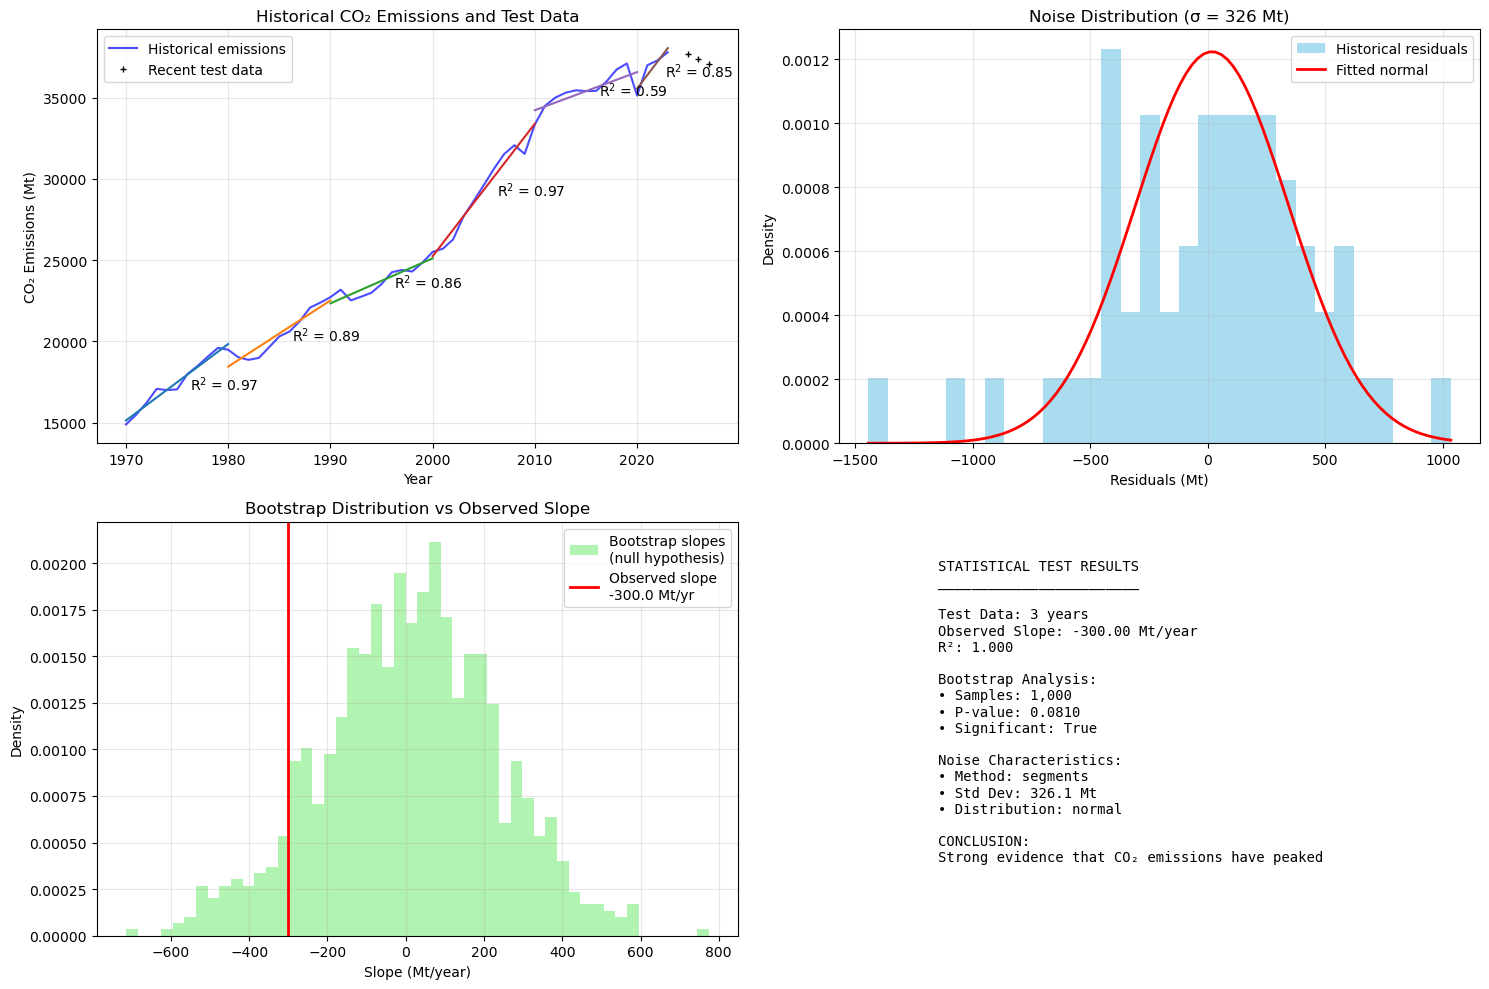

In [9]:
peak_tester.plot_analysis()